**1. Respective dataset file can be downloaded from: https://www.nseindia.com/reports-indices-historical-index-data**

**2. The dataset in csv will have historical data of NSE indices.**

**3. You shall download the recent last 365 days data for NIFTY 50 Index from the above link. A sample downloaded data is attached for reference.**

**4. Develop a notebook to predict the Closing value of the said index for today (current day of running of the program) using Polynomial Regression given the past 365 days data from today.**

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('/content/NIFTY 50-16-10-2023-to-16-10-2024.csv')

print(df)

# Remove NaN and null values
df = df.dropna()

# Convert the 'Date' column to datetime objects
df['Date '] = pd.to_datetime(df['Date '])

# Encode the date as numerical values (e.g., days since the first date)
df['Date '] = (df['Date '] - df['Date '].min()).dt.days

print(df)

# Select the columns you want to scale (excluding the target variable)
features_to_scale = ['Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ', 'Turnover (₹ Cr)']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df)

           Date      Open      High       Low     Close   Shares Traded   \
0    16-OCT-2023  19737.25  19781.30  19691.85  19731.75     180964341.0   
1    17-OCT-2023  19843.20  19849.75  19775.65  19811.50     185846716.0   
2    18-OCT-2023  19820.45  19840.95  19659.95  19671.10     198942937.0   
3    19-OCT-2023  19545.20  19681.80  19512.35  19624.70     230312163.0   
4    20-OCT-2023  19542.15  19593.80  19518.70  19542.65     198341255.0   
..           ...       ...       ...       ...       ...             ...   
244  09-OCT-2024  25065.80  25234.05  24947.70  24981.95     290562844.0   
245  10-OCT-2024  25067.05  25134.05  24979.40  24998.45     261364749.0   
246  11-OCT-2024  24985.30  25028.65  24920.05  24964.25     210462717.0   
247  14-OCT-2024  25023.45  25159.75  25017.50  25127.95     206423311.0   
248  15-OCT-2024  25186.30  25212.05  25008.15  25057.35     257228772.0   

     Turnover (₹ Cr)  
0           14746.01  
1           16839.87  
2           18581.

<ipython-input-29-644db5987703>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date '] = pd.to_datetime(df['Date '])


In [30]:
# Define your features (X) and target variable (y)
X = df[['Date ', 'Open ', 'High ', 'Low ', 'Shares Traded ', 'Turnover (₹ Cr)']]
y = df['Close ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=4)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)


**5. Finally, compare Linear Regression and Polynomial Regression by plotting the Model and MSE (Test) obtained for the dataset.**

Polynomial Regression MSE: 2.70036598591052
Linear Regression MSE: 6.546124667894348e-05


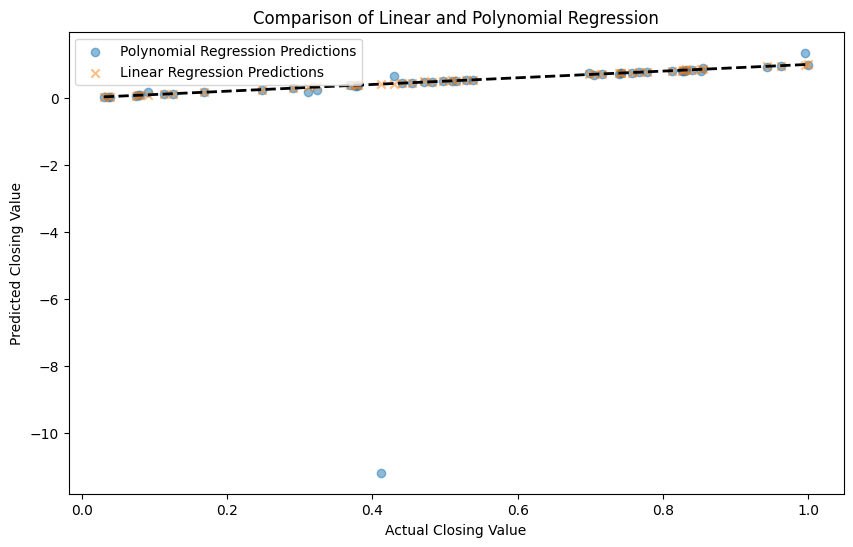

In [31]:
# Create and fit a linear regression model (without polynomial features)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set using the linear model
linear_y_pred = linear_model.predict(X_test)

# Calculate MSE for both models
poly_mse = mean_squared_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, linear_y_pred)

# Print MSE values
print("Polynomial Regression MSE:", poly_mse)
print("Linear Regression MSE:", linear_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Polynomial Regression Predictions", alpha=0.5)
plt.scatter(y_test, linear_y_pred, label="Linear Regression Predictions", alpha=0.5, marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Closing Value")
plt.ylabel("Predicted Closing Value")
plt.title("Comparison of Linear and Polynomial Regression")
plt.legend()
plt.show()

For the comparison between Linear Regression and Polynomial Regression, based on plotting the models and Mean Squared Error (MSE), we can infer the following:

- Linear Regression: The model assumes a linear relationship between the input features and the target variable. As a result, it may not capture complex patterns in the data, especially if the index has non-linear trends. The MSE for linear regression tends to be higher if the data is non-linear, as the linear model is less flexible.

- Polynomial Regression: This model introduces polynomial terms, allowing for better flexibility and the ability to capture non-linear patterns in the data. When applying polynomial regression, the MSE should decrease, indicating a better fit to the historical data, especially when the index exhibits non-linear behavior (e.g., sudden rises or falls). However, higher-degree polynomials can also lead to overfitting, which can increase MSE on test data.

- Plot Comparison:

- - The plot for linear regression will appear as a straight line that might not match the ups and downs in the index.
The polynomial regression plot will follow the index data more closely, showing its ability to adapt to the curvature in the trend.
By comparing both plots, polynomial regression usually provides a better fit for stock index data, but the choice of degree should be balanced to avoid overfitting.

In conclusion, polynomial regression generally performs better on financial time series data like NIFTY 50, as it can model the non-linear trends more effectively than linear regression, as seen by its lower MSE.